In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from IPython.display import SVG

from sklearn.metrics import r2_score


#from keras.utils.vis_utils import model_to_dot
#from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


from IPython.display import Image
import glob
import cv2
import random


from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
import tensorflow

In [2]:
my_Path = 'train_val/'

files = list(glob.glob(my_Path+'*.jpg'))
files
len(files)
files[0:5]

['train_val\\100_1_0_20170112215032192.jpg.chip.jpg',
 'train_val\\100_1_2_20170112213615815.jpg.chip.jpg',
 'train_val\\10_0_0_20161220222308131.jpg.chip.jpg',
 'train_val\\10_1_0_20170109203245653.jpg.chip.jpg',
 'train_val\\116_1_3_20170120134744096.jpg.chip.jpg']

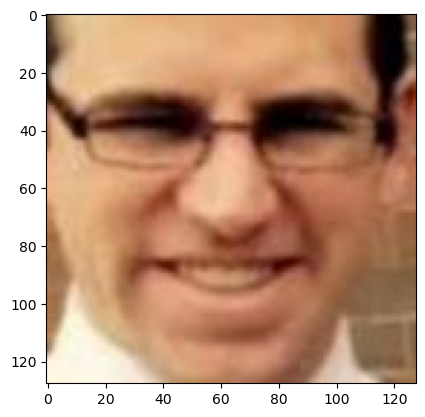

In [3]:
img = cv2.imread(files[55])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)




In [4]:
img.shape

(128, 128, 3)

In [5]:
df = pd.read_csv('df.csv', index_col= 0)

#df.loc[df['Gender'] == 1, 'Gender'] = True
#df.loc[df['Gender'] == 0, 'Gender'] = False

                 


In [6]:
df[df['p_0'] == 103]

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_49144,p_49145,p_49146,p_49147,p_49148,p_49149,p_49150,p_49151,Gender,Age
90,103,103,97,96,96,90,99,100,96,115,...,28,26,41,28,26,41,28,26,0,56
107,103,102,112,93,92,102,84,85,95,85,...,229,210,245,230,214,245,232,216,0,40


In [7]:
X   = df.drop(['Age', 'Gender'], axis = 1)
y = df['Gender']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [8]:
image_rows = 128
image_cols = 128
batch_size = 4096


image_shape = (image_rows,image_cols,3)
train_data = np.array(X_train, dtype = 'float32')
test_data = np.array(X_test, dtype='float32')

train_data = train_data.reshape(train_data.shape[0],*image_shape)
test_data = test_data.reshape(test_data.shape[0],*image_shape)

#x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

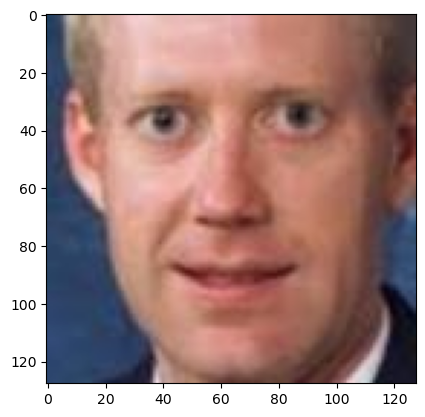

In [9]:
# how to check train / test data

cv2.imwrite('color_img.jpg', test_data[0])
img = cv2.imread("color_img.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)




In [10]:
x_train = train_data/255
x_test= test_data/255

In [11]:


#x_train = x_train.reshape(x_train.shape[0],*image_shape)
#x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_train

array([[[[0.40392157, 0.40392157, 0.38039216],
         [0.3764706 , 0.3764706 , 0.3529412 ],
         [0.3882353 , 0.39215687, 0.3764706 ],
         ...,
         [0.68235296, 0.65882355, 0.6313726 ],
         [0.61960787, 0.58431375, 0.5686275 ],
         [0.52156866, 0.4862745 , 0.47058824]],

        [[0.40392157, 0.40392157, 0.38039216],
         [0.39607844, 0.39607844, 0.37254903],
         [0.40392157, 0.40784314, 0.39215687],
         ...,
         [0.6745098 , 0.6509804 , 0.62352943],
         [0.63529414, 0.6       , 0.58431375],
         [0.5568628 , 0.52156866, 0.5058824 ]],

        [[0.40392157, 0.40392157, 0.38039216],
         [0.41960785, 0.41960785, 0.39607844],
         [0.42352942, 0.42745098, 0.4117647 ],
         ...,
         [0.65882355, 0.63529414, 0.60784316],
         [0.64705884, 0.62352943, 0.6039216 ],
         [0.6039216 , 0.5803922 , 0.56078434]],

        ...,

        [[0.8980392 , 0.81960785, 0.7490196 ],
         [0.94509804, 0.8666667 , 0.79607844]

In [12]:
y_train

90     0
66     1
38     1
55     1
98     0
      ..
106    0
14     1
92     1
179    0
102    0
Name: Gender, Length: 139, dtype: int64

Define your own CNN for classifying the gender and predicting the age. Though there are two tasks, you need only one CNN model, but with two outputs - you may search online for solution.

There are a few restrictions about your network as follows.

* The input size must be 128 x 128 x 3, which means you should not resize the original images. This is because my test code relies on this particular input size. Any other size will cause problem in the testing stage.
* Please treat the gender classification as a binary problem, i.e., the output layer for the gender branch has only 1 unit, instead of 2 (though it is correct to treat the gender classification as a mutli-class problem where class number is 2, the last layer has 2 units). This is because my test code only works for the 1-unit-last-layer gender branch setting.
* The size of feature maps being fed to the first fully connected layer must be less than 10 x 10, while there is no number limitation about the depth.
* You may choose any techniques for preventing overfitting.
In the end of the cell, use modelA.summary() to output the model architecture. You may also use plot_model() to visualize its architecture.

In [13]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = (128, 128, 3)),
    MaxPooling2D(pool_size=2) ,
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(1, activation='sigmoid') # binary classification and 1 unit last-layer - so, sigmoid is quite appropriate 
    
])


cnn_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)


x_train = tensorflow.convert_to_tensor(x_train, dtype=tensorflow.float32) 
x_test = tensorflow.convert_to_tensor(x_test, dtype=tensorflow.float32) 

c:\Users\SHEKHAR\.conda\envs\aws\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [14]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 127008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     4,064,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,065,217 (15.51 MB)

 Trainable params: 4,065,217 (15.51 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=5,
    verbose=1,
    validation_data=(x_test,y_test),
)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - binary_accuracy: 0.5324 - loss: 0.6913 - val_binary_accuracy: 0.5319 - val_loss: 0.8471
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - binary_accuracy: 0.4676 - loss: 0.9104 - val_binary_accuracy: 0.4681 - val_loss: 0.9661
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - binary_accuracy: 0.5324 - loss: 0.8906 - val_binary_accuracy: 0.4681 - val_loss: 0.9274
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - binary_accuracy: 0.5324 - loss: 0.8585 - val_binary_accuracy: 0.4681 - val_loss: 0.7291
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - binary_accuracy: 0.5324 - loss: 0.6839 - val_binary_accuracy: 0.5532 - val_loss: 0.6974


In [16]:
history.history.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

Text(0.5, 1.0, 'Train - Accuracy')

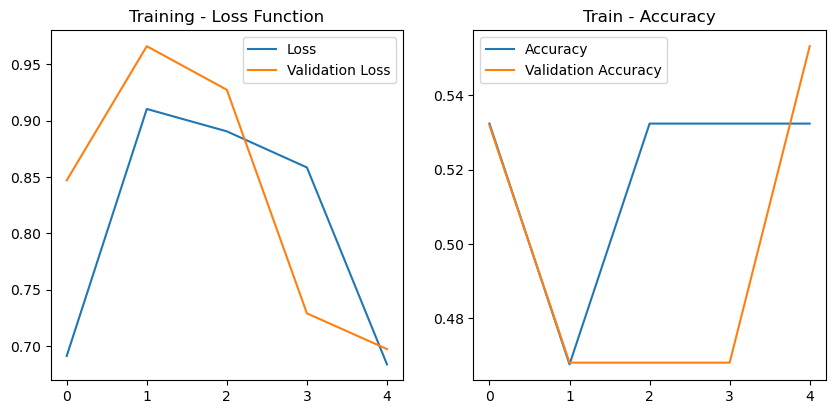

In [17]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['binary_accuracy'], label='Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [18]:
cnn_model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[0.42157495],
       [0.39512175],
       [0.34471506],
       [0.45942435],
       [0.429868  ],
       [0.35437894],
       [0.33918154],
       [0.42599228],
       [0.39299116],
       [0.50504696],
       [0.4181504 ],
       [0.32819286],
       [0.41920662],
       [0.42281353],
       [0.30710217],
       [0.3770596 ],
       [0.43932325],
       [0.4825532 ],
       [0.44062558],
       [0.3506882 ],
       [0.35378212],
       [0.42340225],
       [0.41722366],
       [0.4185723 ],
       [0.39544478],
       [0.43079594],
       [0.42848024],
       [0.39707148],
       [0.34813136],
       [0.4665899 ],
       [0.35604846],
       [0.3778252 ],
       [0.42020598],
       [0.41425174],
       [0.45494992],
       [0.40931872],
       [0.47391018],
       [0.36187214],
       [0.30890948],
       [0.40885454],
       [0.45155874],
       [0.39270493],
       [0.48141292],
       [0.4074193 ],
       [0.38026455],
       [0.37238544],
       [0.4134554 ]], dtype=float3

In [19]:
from tensorflow.keras.models import save_model
save_model(cnn_model, "gender_A.h5")

In [20]:
test_data[0]

array([[[105.,  71.,  41.],
        [103.,  69.,  40.],
        [102.,  68.,  44.],
        ...,
        [ 56.,  56.,  68.],
        [ 58.,  57.,  67.],
        [ 59.,  58.,  68.]],

       [[ 98.,  64.,  34.],
        [ 97.,  63.,  34.],
        [ 98.,  64.,  40.],
        ...,
        [ 56.,  56.,  68.],
        [ 58.,  57.,  67.],
        [ 59.,  58.,  68.]],

       [[ 96.,  62.,  32.],
        [ 95.,  61.,  32.],
        [ 96.,  62.,  38.],
        ...,
        [ 56.,  56.,  68.],
        [ 58.,  57.,  67.],
        [ 59.,  58.,  68.]],

       ...,

       [[109.,  69.,  44.],
        [109.,  69.,  44.],
        [110.,  70.,  45.],
        ...,
        [ 39.,  23.,  24.],
        [ 36.,  22.,  23.],
        [ 35.,  21.,  22.]],

       [[109.,  69.,  44.],
        [110.,  70.,  45.],
        [109.,  72.,  46.],
        ...,
        [ 39.,  23.,  24.],
        [ 39.,  23.,  24.],
        [ 38.,  22.,  23.]],

       [[109.,  69.,  44.],
        [110.,  70.,  45.],
        [109.,  

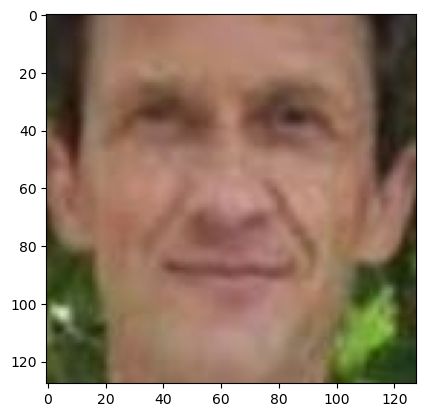

In [21]:
cv2.imwrite('color_img.jpg', test_data[4])
img = cv2.imread("color_img.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

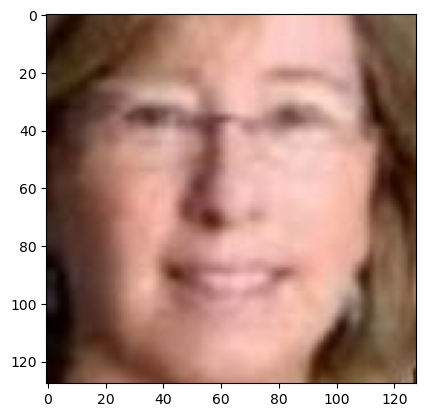

In [22]:
# how to check train / test data

cv2.imwrite('color_img.jpg', test_data[3])
img = cv2.imread("color_img.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [23]:
x_test[0]*255

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[105.,  71.,  41.],
        [103.,  69.,  40.],
        [102.,  68.,  44.],
        ...,
        [ 56.,  56.,  68.],
        [ 58.,  57.,  67.],
        [ 59.,  58.,  68.]],

       [[ 98.,  64.,  34.],
        [ 97.,  63.,  34.],
        [ 98.,  64.,  40.],
        ...,
        [ 56.,  56.,  68.],
        [ 58.,  57.,  67.],
        [ 59.,  58.,  68.]],

       [[ 96.,  62.,  32.],
        [ 95.,  61.,  32.],
        [ 96.,  62.,  38.],
        ...,
        [ 56.,  56.,  68.],
        [ 58.,  57.,  67.],
        [ 59.,  58.,  68.]],

       ...,

       [[109.,  69.,  44.],
        [109.,  69.,  44.],
        [110.,  70.,  45.],
        ...,
        [ 39.,  23.,  24.],
        [ 36.,  22.,  23.],
        [ 35.,  21.,  22.]],

       [[109.,  69.,  44.],
        [110.,  70.,  45.],
        [109.,  72.,  46.],
        ...,
        [ 39.,  23.,  24.],
        [ 39.,  23.,  24.],
        [ 38.,  22.,  23.]],

       [[109.,  6

In [ ]:
cv2.imread(files[0])

array([[[ 13,  16,  14],
        [ 11,  14,  12],
        [ 10,  13,  11],
        ...,
        [165, 170, 161],
        [161, 166, 157],
        [158, 163, 154]],

       [[ 15,  18,  16],
        [ 16,  19,  17],
        [ 17,  20,  18],
        ...,
        [167, 172, 163],
        [163, 168, 159],
        [160, 165, 156]],

       [[ 13,  16,  14],
        [ 15,  18,  16],
        [ 18,  21,  19],
        ...,
        [171, 176, 167],
        [164, 172, 162],
        [160, 168, 158]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [ ]:
x_test[0]

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.4117647 , 0.2784314 , 0.16078432],
        [0.40392157, 0.27058825, 0.15686275],
        [0.4       , 0.26666668, 0.17254902],
        ...,
        [0.21960784, 0.21960784, 0.26666668],
        [0.22745098, 0.22352941, 0.2627451 ],
        [0.23137255, 0.22745098, 0.26666668]],

       [[0.38431373, 0.2509804 , 0.13333334],
        [0.38039216, 0.24705882, 0.13333334],
        [0.38431373, 0.2509804 , 0.15686275],
        ...,
        [0.21960784, 0.21960784, 0.26666668],
        [0.22745098, 0.22352941, 0.2627451 ],
        [0.23137255, 0.22745098, 0.26666668]],

       [[0.3764706 , 0.24313726, 0.1254902 ],
        [0.37254903, 0.23921569, 0.1254902 ],
        [0.3764706 , 0.24313726, 0.14901961],
        ...,
        [0.21960784, 0.21960784, 0.26666668],
        [0.22745098, 0.22352941, 0.2627451 ],
        [0.23137255, 0.22745098, 0.26666668]],

       ...,

       [[0.42745098, 0.27058825, 0.17254902],
        [0.42

In [ ]:
cnn_model.predict(x_test).shape

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(47, 1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


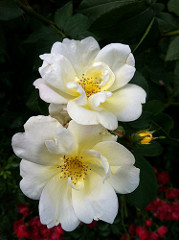

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [ ]:
data_dir

WindowsPath('C:/Users/SHEKHAR/.keras/datasets/flower_photos')

In [ ]:
roses[0]

WindowsPath('C:/Users/SHEKHAR/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

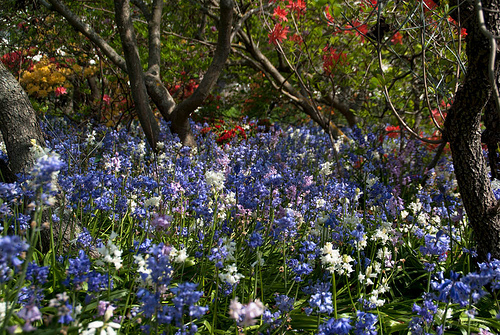

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))
PIL.Image.open(str(tulips[1]))

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'E:\Projects\Multi-CNN',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(128, 128),
  batch_size=batch_size)

Found 186 files belonging to 1 classes.


Using 149 files for training.


In [ ]:
type(train_ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.99803925


In [ ]:

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

c:\Users\SHEKHAR\.conda\envs\aws\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs=2
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 203ms/step - accuracy: 0.3679 - loss: 1.4474 - val_accuracy: 0.5422 - val_loss: 1.0912
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 232ms/step - accuracy: 0.6033 - loss: 1.0045 - val_accuracy: 0.6172 - val_loss: 0.9375
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 236ms/step - accuracy: 0.6956 - loss: 0.8192 - val_accuracy: 0.6567 - val_loss: 0.9039
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 244ms/step - accuracy: 0.7434 - loss: 0.6759 - val_accuracy: 0.6390 - val_loss: 0.9451
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 244ms/step - accuracy: 0.8315 - loss: 0.4683 - val_accuracy: 0.6417 - val_loss: 1.0366
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 242ms/step - accuracy: 0.9024 - loss: 0.2842 - val_accuracy: 0.6649 - val_loss: 1.2249
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 238ms/step - accuracy: 0.9352 - loss: 0.1909 - val_accuracy: 0.6662 - val_loss: 1.4323
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 239ms/step - accuracy: 0.9636 - loss: 0.1074 - val_accu

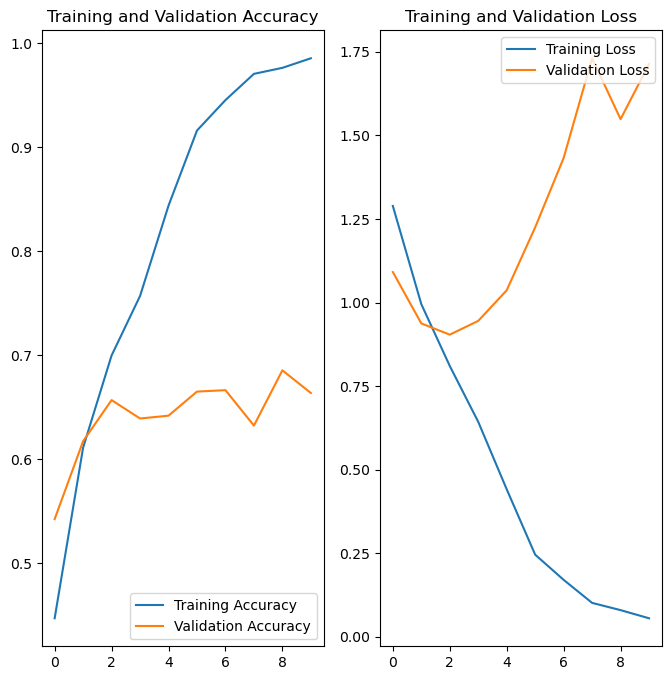

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()